In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [2]:
df=pd.read_csv('diabetes.csv')
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [5]:
df.isnull().sum().sum()

0

In [6]:
data=["Glucose","BloodPressure", "SkinThickness", "Insulin","BMI"]

for col in data:
    df[col]=df[col].replace(0,np.NaN)
    mean=int(df[col].mean(skipna=True))
    df[col]=df[col].replace(np.NaN,mean)

In [7]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,ConfusionMatrixDisplay,f1_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.25)


In [9]:
def fit_predict(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.25)
    std_x=StandardScaler()
    x_train=std_x.fit_transform(x_train)
    x_test=std_x.transform(x_test)
    
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    cm=confusion_matrix(y_test,y_pred)
    display=ConfusionMatrixDisplay(cm)
    display.plot()
    
    print("Confusion Matrix: ")
    print(cm)
    print("Accuracy Score: ",accuracy_score(y_test,y_pred))
    print("Recall Score: ",recall_score(y_test,y_pred))
    print("F1 Score: ",f1_score(y_test,y_pred))
    print("Precision Score: ",precision_score(y_test,y_pred))

Confusion Matrix: 
[[105  16]
 [ 42  29]]
Accuracy Score:  0.6979166666666666
Recall Score:  0.4084507042253521
F1 Score:  0.5
Precision Score:  0.6444444444444445


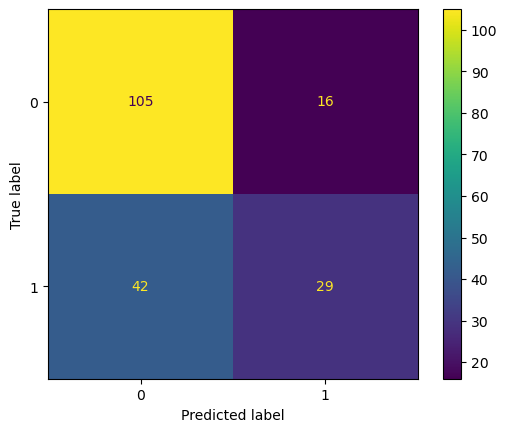

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
fit_predict(knn)